### Project Description

I tried to create a basic Genetic Algorithm that recognizes the number zero written using zeros and ones like the example below.

1 1 1 <br>
1 0 1 <br>
1 0 1 <br>
1 1 1 <br>

The main function receives a bitstring created rearranging the written number in a way that fits in a list (i just got each line of the number put it one in front of the other), like this [1 1 1 1 0 1 1 0 1 1 1 1].

<br>
<FONT COLOR="#ff0000">Upgrades to do: </FONT> <br>
1- Create a hyper parameterization function (create my on function or use grid search or hyper parameter tunning)
<br><br>
2- Calculate entropy using Shannon Entropy<br>
3- Calculate mutual information (mutual information python)<br>
4- Apply other kinds of cross over (ex.: vector multiplication)<br>

### Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### Functions

In [2]:
# Function that initialize an random matrix within a random number of subjects
def initialize_population(num_subjects):
    initial_matrix = []
    for _ in range(num_subjects):
        subject = []
        for _ in range(12):
            random_value = round(np.random.random(1)[0], 0)
            subject.append(int(random_value))
        initial_matrix.append(subject)
    return initial_matrix

In [3]:
# Function that measure the hamming distance given a population and a target to reach
def hamming_distance(population, target):
    final_score = []
    for subject in population:
        score = 0
        for i in range(len(subject)):
            if subject[i] != target[i]:
                score += 1
        final_score.append(score)
    return final_score

In [4]:
# Function that measure the population fitness based upon a given hamming distance
def fitness(target, population_score):
    final_fitness = []
    ideal_fitness_score = len(target)
    for score in population_score:
        final_fitness.append(ideal_fitness_score - score)
    return final_fitness

In [5]:
# Function that searches for the optimal subject inside a population, if it finds the return will be true otherwise it returns false
def check_fitness(target, population_fitness):
    approved = False
    for fitness in population_fitness:
        if len(target) == fitness:
            approved = True
    return approved

In [6]:
"""
Set of functions that are used to select a new population using the roulette selection rule
"""

def section_selection(population_fitness):
    total_fitness = sum(population_fitness) + 0.0001
    subjects_section = []
    for fitness in population_fitness:
        section = (360 * fitness) / total_fitness
        subjects_section.append(int(round(section, 0)))
    return subjects_section

def sections_formatter(sections):
    curr_sum = 0
    formatted_sections = []
    for sec in sections:
        if curr_sum == 0:
            curr_sum = sec
        else:
            curr_sum += sec
        formatted_sections.append(curr_sum)
    return formatted_sections

def roulette_selection(sections, num_population):
    fttd_sections = sections_formatter(sections)
    final_selection = []
    for _ in range(num_population):
        random_num = np.random.randint(0, 360)
        choosed_subject = 0
        for i in range(len(fttd_sections)):
            if i == 0:
                if random_num <= fttd_sections[i]:
                    choosed_subject = i
                    break
        if (random_num > fttd_sections[i-1]) and (random_num <= fttd_sections[i]):
            choosed_subject = i
        final_selection.append(choosed_subject)
    return final_selection

In [7]:
# Function that separates the subjects in the population and given a probability it does a cross over between a pair of subjects
def cross_over(pc, selected_subjects, population, target):
    pairs_of_subjects = []
    new_population = []
    for i in range(1, len(selected_subjects), 2):
        pairs_of_subjects.append([selected_subjects[i-1], selected_subjects[i]])

    for pair_index in range(len(pairs_of_subjects)):
        pair = pairs_of_subjects[pair_index]
        c_o_chances = np.random.random(1)[0] # Chances of cross over occuring
        if c_o_chances <= pc:
            cp = np.random.randint(1, len(target) - 1) # Cross Over Point

            first_half_1  = population[pair[0]][:cp]
            second_half_1 = population[pair[0]][cp:]

            first_half_2  = population[pair[1]][:cp]
            second_half_2 = population[pair[1]][cp:]

            child_1 = first_half_1 + second_half_2
            child_2 = first_half_2 + second_half_1

            new_population.append(child_1)
            new_population.append(child_2)
        else:
            new_population.append(population[pair[0]])
            new_population.append(population[pair[1]])
    return new_population

In [8]:
# Function that go over each subject in the population, and given a certain predefined chance it mutates the subject or not 
def mutation(pm, population):
    for row_i in range(len(population)):
        for col_i in range(len(population[row_i])):
            mutation_chance = np.random.random(1)[0]
            if mutation_chance <= pm:
                if population[row_i][col_i] == 0:
                    population[row_i][col_i] = 1
                else:
                    population[row_i][col_i] = 0
    return population

In [9]:
# Function that calculates the average of an given array
def average(array):
    x = sum(array)
    y = len(array)
    return x / y

# Function that makes use of all the other functions above to create a loop of iteratinos that is suposed to evolve to an optimal subject
def evolutive_algorithm(max_it, target, pc=0.6, pm=0.02, population_num=10):
    result = []
    population_score = []
    population_fitness = []
    score_by_it = [] 
    fitness_by_it = []
    end_loop = 0

    i = 0
    while i < max_it:
        if i == 0:
            population = initialize_population(population_num)
            print(f"Initial Population:")
            for row in population:
                print(row)
            print("\n")
            print(f"Target: {target} \n")
        else:
            population = result

        population_score = hamming_distance(population, target)
        score_by_it.append(average(population_score))
        # print(f"Population Score: {average(population_score)} \n")

        population_fitness = fitness(target, population_score)
        fitness_by_it.append(average(population_fitness))
        # print(f"Population Fitness: {average(population_fitness)} \n")

        if check_fitness(target, population_fitness):
            end_loop = i
            print(f"Ended in loop {i} - Target reached \n")
            break

        sections = section_selection(population_fitness)

        selected_subjects = roulette_selection(sections, population_num)

        population = [population[i] for i in selected_subjects]

        co_population = cross_over(pc, selected_subjects, population, target)

        mutated_population = mutation(pm, co_population)

        result = mutated_population
        i += 1
    return result, population_score, population_fitness, score_by_it, fitness_by_it, end_loop

In [10]:
max_it = 1000
target = [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
pc = 0.7
pm = 0.3
population_num = 16

result, population_score, population_fitness, avg_score_by_it, avg_fitness_by_it, end_loop = evolutive_algorithm(max_it, target, pc, pm, population_num)
print(f"Result:")
for row in result:
    print(row)
print("\n")
print(f"Population Score:   {population_score}")
print(f"Population Fitness: {population_fitness}")

Initial Population:
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1]
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1]
[0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Target: [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1] 

Ended in loop 292 - Target reached 

Result:
[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1

<AxesSubplot:xlabel='Iteration', ylabel='Fitness By Iteration'>

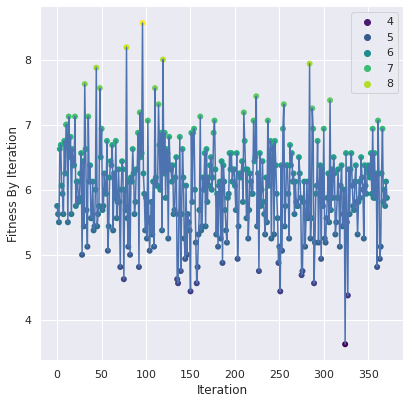

In [74]:
# Creating the dataset ------------------
iteration = [it for it in range(len(avg_fitness_by_it))]

fit_df = pd.DataFrame(avg_fitness_by_it, columns=["Fitness By Iteration"])
fit_df["Iteration"] = iteration

score_df = pd.DataFrame(avg_score_by_it, columns=["Score By Iteration"])
score_df["Iteration"] = iteration

# Plotting the data  ------------------
sns.set_theme(style="darkgrid")
sns.color_palette("rocket", as_cmap=True)

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

sns.scatterplot(x="Iteration", y="Fitness By Iteration",
                hue="Fitness By Iteration", 
                palette="viridis", 
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=fit_df, ax=ax)

sns.lineplot(x="Iteration", y="Fitness By Iteration",
             data=fit_df)